# Follow these instructions:

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

# Assignment 6: Model Selection and Cross-validation [ __ /100 marks]


In this assignment we will examine ["Forest Fires"](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) dataset to predict the burned area of forest fires giving some features. We will apply model selection and cross-validation method we learned.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, TransformerMixin
np.set_printoptions(precision=3)
seed=0

## Question 1.0 [ _ /6 marks]

Read the file `forestfires.csv` into a dataframe. Display the first 5 rows of this dataframe. 

In [2]:
# Read forestfires.csv into a dataframe [ /1 marks] 
df = pd.read_csv('forestfires.csv')

# Display the first 5 rows of the dataframe [ /1 marks]
print(df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [3]:
# Inspect the data types of the attributes in the dataframe and answer the question in the next cell

# Number of rows in the dataframe
print("Number of rows: " + str(df.shape[0]))

# Number of null entries in the dataframe
print("Number of null entries: " + str(df.isnull().sum().sum()))

# Types of all the columns (variables) in a dataframe
print(df.dtypes)

Number of rows: 517
Number of null entries: 0
X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


 **Questions**:
 1. How many rows are there?  [ /1 marks]
 2. Does the data consist of any null entries? [ /1 marks]
 3. What categorical attributes do you see? [ /2 marks]
 
**Your answer**:
1. 517
2. No, there are zero null entries.
3. month and day are both categorical attributes.

## Question 1.1 [ _ /15 marks]

Using a threshold of statistical significance of 5%, check statistical significance for the labels of each categorical attribute. Group insignificant labels into two new statistically significant classes.

In [4]:
# Check statistical significance of the labels in month. [ /3 marks]
print("Percentages:")
print(df['month'].value_counts()/df.shape[0] * 100)

Percentages:
month
aug    35.589942
sep    33.268859
mar    10.444874
jul     6.189555
feb     3.868472
jun     3.288201
oct     2.901354
apr     1.740812
dec     1.740812
jan     0.386847
may     0.386847
nov     0.193424
Name: count, dtype: float64


In [5]:
# Check statistical significance of labels in categorical attribute 2. [ /3 marks]
print("Percentages:")
print(df['day'].value_counts()/df.shape[0] * 100)

Percentages:
day
sun    18.375242
fri    16.441006
sat    16.247582
mon    14.313346
tue    12.379110
thu    11.798839
wed    10.444874
Name: count, dtype: float64


In [6]:
# Group insignificant labels into two new statistically significant labels. [ /8 marks]
# Months: feb, jun, oct, apr, dec, jan, may, nov

# Group up nov, may, jan, dec, apr, and oct
df['month'] = df['month'].replace(['nov', 'may', 'jan', 'dec', 'apr', 'oct'], 'nov_may_jan_dec_apr_oct')

# Group up jun, feb
df['month'] = df['month'].replace(['jun', 'feb'], 'jun_feb')

In [7]:
# Recheck statistical significance of the attribute with adjusted labels [ /1 marks]
# ****** your code here ******
print("Percentages:")
print(df['month'].value_counts()/df.shape[0] * 100)

Percentages:
month
aug                        35.589942
sep                        33.268859
mar                        10.444874
nov_may_jan_dec_apr_oct     7.350097
jun_feb                     7.156673
jul                         6.189555
Name: count, dtype: float64


## Question 1.2 [ _ /4 marks]

Let's convert all categorical data into numerical data using `get_dummies`. Display the first 5 rows of your new dataframe.

In [8]:
# Use "get_dummies" to perform one hot encoding to the categorical attributes [ /3 marks]
# ****** your code here ****** 
df = pd.get_dummies(df, columns=['month', 'day'])

# Display first 5 rows of the dataframe [ /1 mark]
# ****** your code here ****** 
print(df.head())

   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_mar  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...       True   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...      False   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...      False   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...       True   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...       True   

   month_nov_may_jan_dec_apr_oct  month_sep  day_fri  day_mon  day_sat  \
0                          False      False     True    False    False   
1                           True      False    False    False    False   
2                           True      False    False    False     True   
3                          False      False     True    False    False   
4                          False      False    False    False    False   

   day_sun  day_thu  day_tue  day_wed  
0    False    False    False    False  
1    False    False     True    Fals

In [9]:
# The .head() in the previous cell might give a truncated view. You can see all columns names using: 
df.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_aug', 'month_jul', 'month_jun_feb', 'month_mar',
       'month_nov_may_jan_dec_apr_oct', 'month_sep', 'day_fri', 'day_mon',
       'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

## Question 1.3 [ _ /8 marks]

Let's examine the distribution of the target variable "area".

<Axes: xlabel='area', ylabel='Count'>

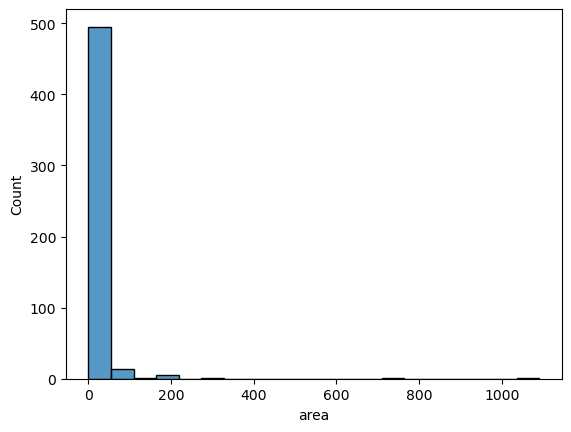

In [10]:
# Plot the distribution of target variable "area" with bins = 20 using an appropriate seaborn function [ /1 mark]
# ****** your code here ****** 
sns.histplot(df['area'], bins=20)

 **Question**:
 
 Describe the distribution of the target variable. We will use log transform on it, explain why would it help. [ /3 mark]

**Your answer**:

The distribution is very heavily left-tailed and skewed. Log transformation will help to normalize the data and re-shape it into more of a bell-curve.

<Axes: xlabel='area', ylabel='Count'>

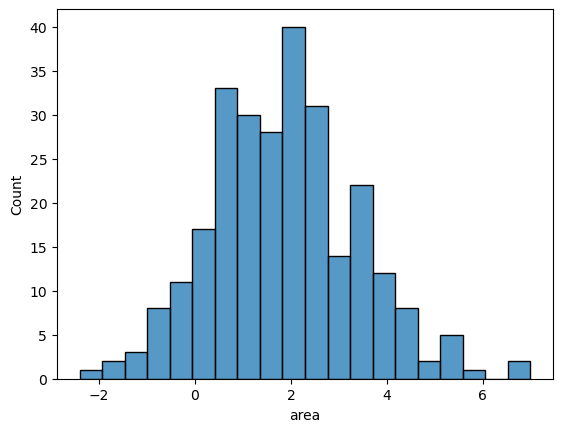

In [11]:
# Use np.log to transform "area". [ /3 mark]
# Note that log is not defined every where and you might need to do something about it.
# ****** your code here ****** 

# Handle area of 0 by removing them
df = df[df['area'] != 0]

df['area'] = np.log(df['area'])


# Plot the distribution of target variable "area" with bins = 20 using an appropriate seaborn function [ /1 mark]
# ****** your code here ****** 
sns.histplot(df['area'], bins=20)

## Question 1.4 [ _ /6 marks]

Let's use **mean squared error** as our score metric. We can use `sklearn.metrics.mean_squared_error`, but here let's write our own function called `mse` with arguments `y` and `ypr`(predicted y) which returns the mean squared error. Recall the formula for MSE below:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}  \left( \hat{y_{i}}-y_{i}\right)^{2} $$

In [12]:
# Define a function that takes in y's and returns MSE [ /6 marks]
# ****** your code here ****** 
def mse(y, ypr):
    return np.mean((y - ypr)**2)

## Question 1.5 [ _ /4 marks]

We will use all available features as predictors, and use the log transformed "area" as target variable. Then let's split our data into training and test. As usual, let's use test_size=0.2 and random_state=seed.

In [13]:
# Create X and y [ /2 marks]
# ****** your code here ******
X = df.drop('area', axis=1)
y = df['area']

# Use train_test_split on X, y [ /2 marks]
# ****** your code here ****** 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Question 1.6 [ _ / 6 marks]

For our first model, create a pipeline called "M1" that performs only a linear regression. 

In [14]:
# Create a pipeline for model 1 (M1) [ /6 marks]
# ****** your code here ****** 
model1 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

## Question 1.7 [ _ / 8 marks]

For our second model let's add quadratic terms for all features (use `PolynomialFeatures`). Create a model pipeline for our second model (M2).

In [15]:
# Create a pipeline for model 2 (M2) [ / 8 marks]
# ****** your code here ****** 
model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

## Question 1.8 [ _ / 18 marks]

`Temperature (temp)` and `Rain (rain)` may be important features, so let's extend model 1 by adding a *cubed* term for temp and a *squared* term for rain. Before creating a pipeline for this model, we need a custom transformer: we can specify a column for squared rain and one for cubed temp. The transformer has been initialized below, but you'll need to complete it with adding 1 or 2 lines of code. After this, create your corresponding pipeline (M3).

In [16]:
# Modify the transform method of the KeyFeatures class [ /10 marks] by adding cubed temp and squared rain
class KeyFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Fit new model
        return self

    def transform(self, X, y=None):
        # Transform for cubed temp and squared rain
        X['temp_cubed'] = X['temp']**3
        X['rain_squared'] = X['rain']**2
        return X

# Create a pipeline for model 3 (M3) [ /8 marks]
# ****** your code here ****** 
model3 = Pipeline([
    ('key_features', KeyFeatures()),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

## Question 1.9 [ _ /8 marks]

For models 1-3, use 4-fold Cross-validation and report the mean and std of the loss (i.e., the `mse` function you created for Q1.4). For the cross-validation part, use `from sklearn.metrics import make_scorer` to make a scorer out of your `mse` function.

In [17]:
# Use 4-fold CV on all models to get mean and std of score [ /8 marks]
# ****** your code here ******
cvsc1 = cross_val_score(model1, X_train, y_train, cv=4, scoring=make_scorer(mse))
cvsc2 = cross_val_score(model2, X_train, y_train, cv=4, scoring=make_scorer(mse))
cvsc3 = cross_val_score(model3, X_train, y_train, cv=4, scoring=make_scorer(mse))

print(f"M1 loss: %.4f +/- %.4f" % (cvsc1.mean(), cvsc1.std()))
print(f"M2 loss: %.4f +/- %.4f" % (cvsc2.mean(), cvsc2.std()))
print(f"M3 loss: %.4f +/- %.4f" % (cvsc3.mean(), cvsc3.std()))

M1 loss: 2.6549 +/- 0.2821
M2 loss: 11061174247715547136.0000 +/- 18003641585539713024.0000
M3 loss: 2.6257 +/- 0.2716


## Question 2.0 [ _ / 3 marks]

**Question**: 

Which model would you choose and why? [ /3 marks]

**Your answer**:

M3. It has the lowest loss with a smaller +/- than the M1 model, and the M2 model is way worse than both M1 and M3

## Question 2.1 [ _ /  6 marks]

Estimate the performance of your chosen model on the test data (which has been held out) using `mse`. 

In [18]:
# Compute the test loss on the unseen (test) dataset [ /6 marks]
# ****** your code here ******
model3.fit(X_train, y_train)

print('MSE Loss on test data:', mse(y_test, model3.predict(X_test)))

MSE Loss on test data: 3.9277224131946706


## Question 2.2 [ _ /8 marks]

Recap: The central limit theorem (CLT) states that if you have a population with mean $\mu$ and standard deviation $\sigma$ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed. This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually greater than 30).

Compute (and print) a 95% confidence interval for the average test error using the Central Limit Theorem. You can use the following formula to compute it: 

$$ \bar{L_n} \pm 1.96 * \frac{\sigma_{l}}{\sqrt{n}}$$

Here $\bar{L_n}$ is the average test loss (i.e. for our test set), $\sigma_l$ is the standard deviation (of our test losses), and $n$ is the total number of test losses we compute.  

In [19]:
# Test loss here is a point estimate (statistic) for the generalization error
# Having >30 samples, we can use the formula above safely
# Here we compute confidence interval for generalization error (i.e.expected [average] test loss for this particular dataset)

# Calculate the 95% Confidence Interval for average test loss [ /8 marks]
# ****** your code here ****** 
n = X_test.shape[0]
loss = mse(y_test, model3.predict(X_test))

# Get CI both +/-
ci = 1.96 * np.sqrt(loss/n)

print('Confidence Interval is:', np.array([loss - ci, loss + ci]))

Confidence Interval is: [3.399 4.456]


# Follow these instructions:

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.